In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#Reading the csv files
df = pd.read_csv('/home/zack83/Dropbox/Tripura_University/Project_Final/Liver_Disease_Predection/Cirrhosis/cirrhosis.csv')

In [3]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [4]:
df.head()         #reading the first five values

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
## dropping the unnecessary values which cannot be used on later satges
df = df.drop(['ID','N_Days','Drug','Tryglicerides','Edema',],axis = 1)

In [6]:
##imputing median values for numerical type columns
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

Age            0
Bilirubin      0
Cholesterol    0
Albumin        0
Copper         0
Alk_Phos       0
SGOT           0
Platelets      0
Prothrombin    0
Stage          0
dtype: int64

In [7]:
##imputing mode values for categorial type columns
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isna().sum()

Status          0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
dtype: int64

In [8]:
df.head()

,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage
0,D,21464,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,190.0,12.2,4.0
1,C,20617,F,N,Y,Y,1.1,302.0,4.14,54.0,7394.8,113.52,221.0,10.6,3.0
2,D,25594,M,N,N,N,1.4,176.0,3.48,210.0,516.0,96.10,151.0,12.0,4.0
3,D,19994,F,N,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,183.0,10.3,4.0
4,CL,13918,F,N,Y,Y,3.4,279.0,3.53,143.0,671.0,113.15,136.0,10.9,3.0


In [9]:
df['Age'] = df ['Age'].floordiv(365)                #floor division of age with 365 cause the given data are in days

In [10]:
#converting the categorial values into numerical so that can be merged with all the datasets
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})
df['Status'] = df['Status'].replace({'C':0,'D':1,'CL':0})
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})

In [11]:
df.head()

,Status,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin,Stage
0,1,58,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,190.0,12.2,4.0
1,0,56,1,0,1,1,1.1,302.0,4.14,54.0,7394.8,113.52,221.0,10.6,3.0
2,1,70,0,0,0,0,1.4,176.0,3.48,210.0,516.0,96.10,151.0,12.0,4.0
3,1,54,1,0,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,183.0,10.3,4.0
4,0,38,1,0,1,1,3.4,279.0,3.53,143.0,671.0,113.15,136.0,10.9,3.0


In [12]:
# df['Stage'] = np.where(df['Stage'] == 4,1,0)

In [13]:
# df.to_csv("/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Cirr_Test000.csv",index = False)

In [14]:
df["Stage"].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

In [15]:
#Setting of Target values
X=df.drop(['Status','Stage'],axis = 1)
y=df['Status']

In [16]:
#Splitting of data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (334, 13)
Test Shape: (84, 13)


In [17]:
#Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7261904761904762
Report card of this model - 
              precision    recall  f1-score   support

           0      0.754     0.827     0.789        52
           1      0.667     0.562     0.610        32

    accuracy                          0.726        84
   macro avg      0.711     0.695     0.700        84
weighted avg      0.721     0.726     0.721        84

Accuracy score -  0.7261904761904762


Text(20.72222222222222, 0.5, 'Truth')

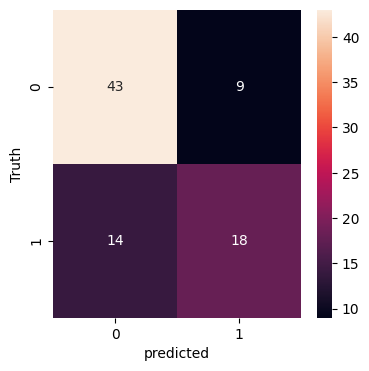

In [18]:
#Confusion Matrix
y_predicted = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [19]:
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.7619047619047619
Report card of this model - 
              precision    recall  f1-score   support

           0      0.742     0.942     0.831        52
           1      0.833     0.469     0.600        32

    accuracy                          0.762        84
   macro avg      0.788     0.706     0.715        84
weighted avg      0.777     0.762     0.743        84

Accuracy score -  0.7619047619047619


Text(20.72222222222222, 0.5, 'Truth')

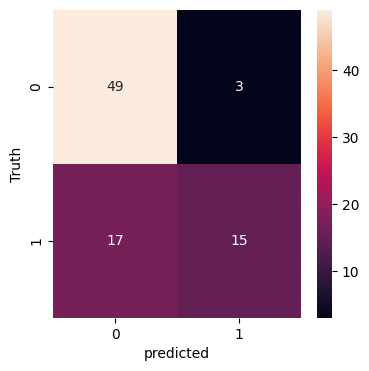

In [20]:
#Confusion Matrix
y_predicted = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

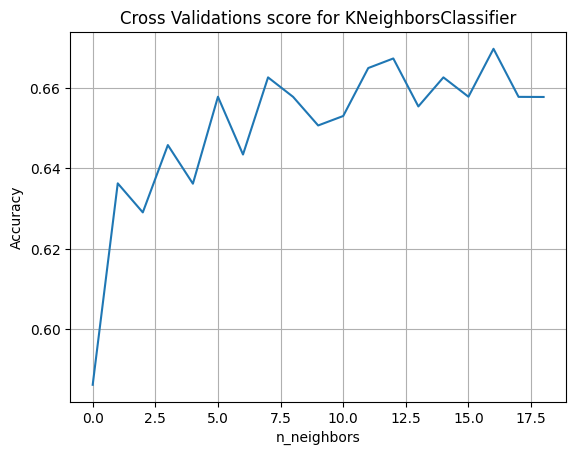

In [21]:
hist = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =9)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.7380952380952381
Report card of this model - 
              precision    recall  f1-score   support

           0      0.727     0.923     0.814        52
           1      0.778     0.438     0.560        32

    accuracy                          0.738        84
   macro avg      0.753     0.680     0.687        84
weighted avg      0.747     0.738     0.717        84

Accuracy score -  0.7380952380952381


Text(20.72222222222222, 0.5, 'Truth')

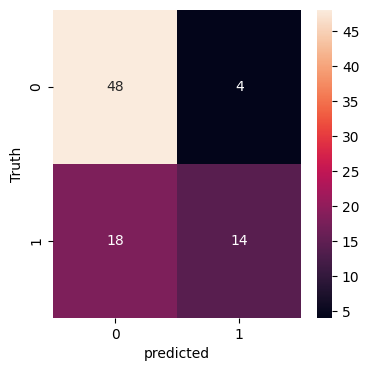

In [23]:
#Confusion Matrix
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

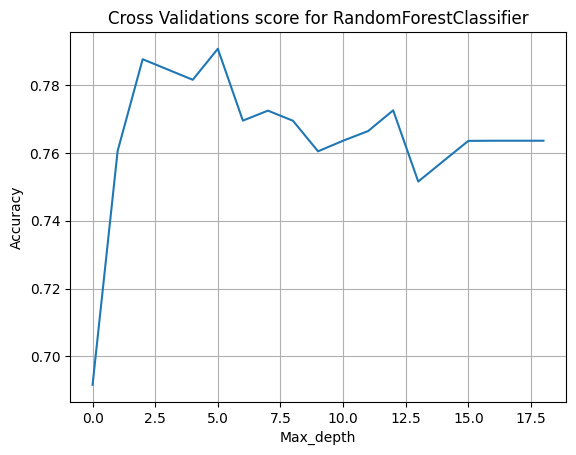

In [24]:
hist1 = []
for i in range(1,20):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [25]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.8214285714285714
Report card of this model - 
              precision    recall  f1-score   support

           0      0.803     0.942     0.867        52
           1      0.870     0.625     0.727        32

    accuracy                          0.821        84
   macro avg      0.836     0.784     0.797        84
weighted avg      0.829     0.821     0.814        84

Accuracy score -  0.8214285714285714


Text(20.72222222222222, 0.5, 'Truth')

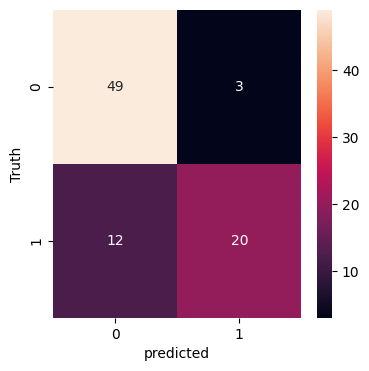

In [26]:
#Confusion Matrix
y_predicted = ran_for.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

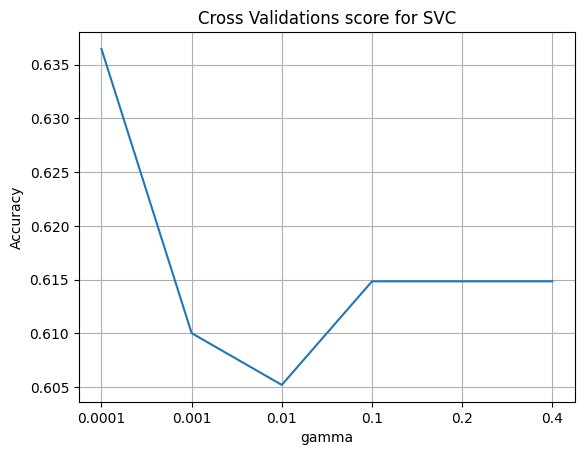

In [27]:
grid = [0.0001,0.001, 0.01, 0.1,0.2,0.4]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [28]:
svm = SVC(kernel= "linear",C=0.01, random_state = 0 , gamma=0.1)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.7857142857142857
Report card of this model - 
              precision    recall  f1-score   support

           0      0.783     0.904     0.839        52
           1      0.792     0.594     0.679        32

    accuracy                          0.786        84
   macro avg      0.787     0.749     0.759        84
weighted avg      0.787     0.786     0.778        84

Accuracy score -  0.7857142857142857


Text(20.72222222222222, 0.5, 'Truth')

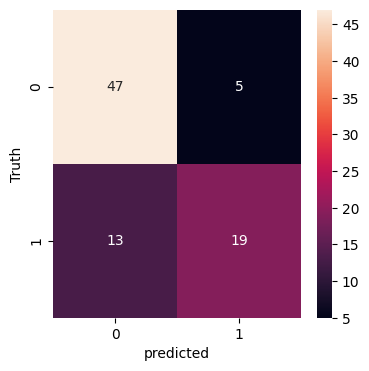

In [29]:
#Confusion Matrix
y_predicted = svm.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

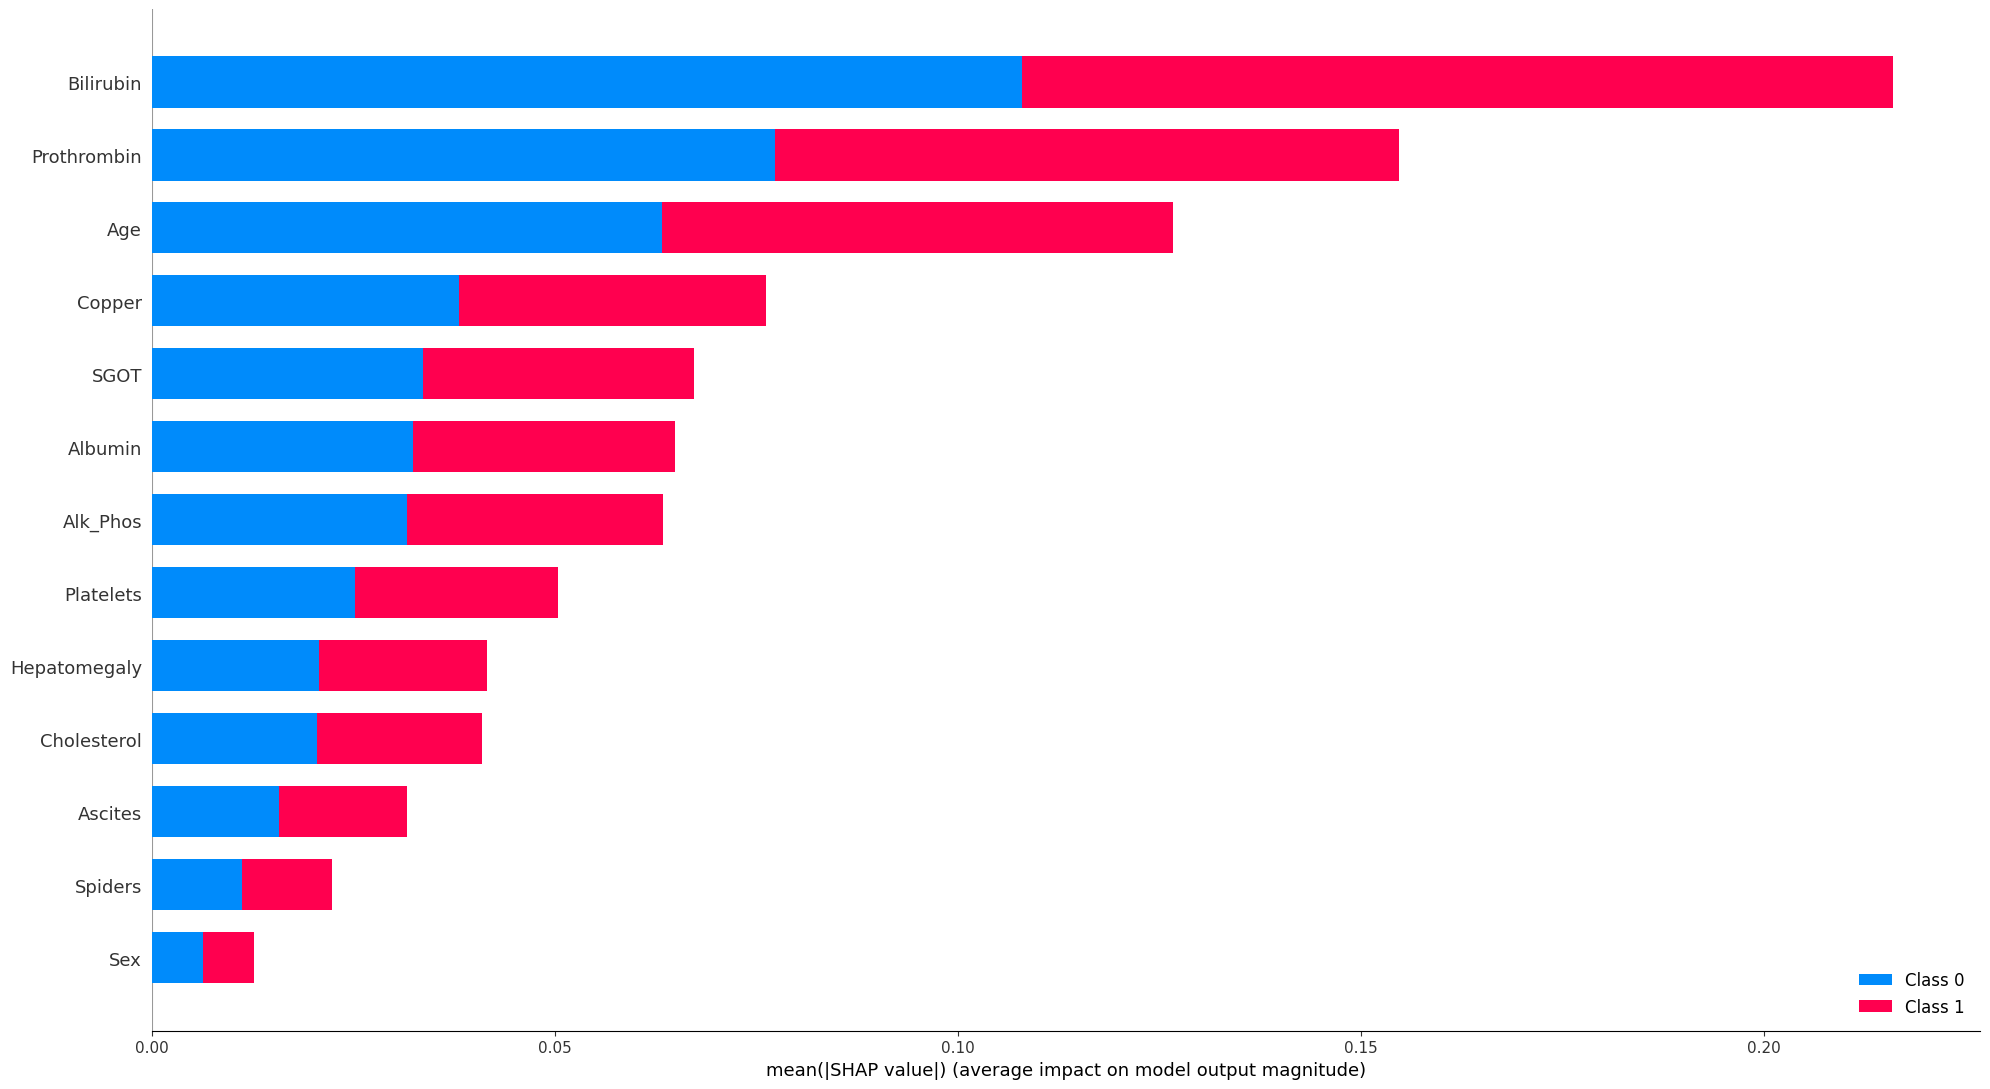

In [30]:
import shap
from sklearn.ensemble import RandomForestClassifier         # using random forest to explain for ease
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X, y)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(20,11), alpha=0.2, plot_type='bar')

In [31]:
df['Status'].value_counts()

Status
0    257
1    161
Name: count, dtype: int64